In [21]:
from collections.abc import Iterable
import matplotlib.pyplot as plt
import math

In [22]:
def frange(start: float, stop: float, step: float) -> Iterable[float]:
    while start < stop:
        yield round(start, 10)
        start += step

def iota(start: float, end: float, step: float) -> list:
    array = []
    for i in frange(start, end, step):
        array.append(i)
    return array

In [23]:
def reinhard(values: list) -> list:
    converted_values = []
    for value in values:
        tone_mapped_value = value / (1 + value)
        converted_values.append(tone_mapped_value)
    return converted_values

In [24]:
# Where to end the range of toe = Where to start the range of linear.
m = 0.22

# To control contrast.
a = 1.0

# Max monitor luminance. 100[nit] = 1.0
P = 1.0

# The range of linear.
l = 0.4

l0 = (P - m) * l / a

def gt_tonemapper_toe(x: float) -> float:
    b = 0.0
    c = 1.33
    T = m * pow(x / m, c) + b
    return T

def gt_tonmapper_linear(x: float) -> float:
    L = m + a * (x - m)
    return L

def gt_tonemapper_shoulder(x: float) -> float:
    S0 = m + l0
    S1 = m + a * l0
    C2 = a * P / (P - S1)
    S = P - (P - S1) * math.exp(-C2 * (x - S0) / P)
    return S

def h(x: float, e0: float, e1: float) -> float:
    if x <= e0:
        return 0.0
    elif x >= e1:
        return 1.0
    else:
        v = (x - e0) / (e1 - e0)
        result = v**2 * (3 - 2 * v)
        return result

def w(x: float, e0: float, e1: float) -> float:
    if x <= e0:
        return 0.0
    elif x >= e1:
        return 1.0
    else:
        return (x - e0) / (e1 - e0)

def gt_tonemapper(values: list) -> list:
    converted_values = []
    for x in values:
        T = gt_tonemapper_toe(x)
        L = gt_tonmapper_linear(x)
        S = gt_tonemapper_shoulder(x)

        w0 = 1 - h(x, 0, m)
        w2 = h(x, m + l0, m + l0)
        w1 = 1 - w0 - w2

        result = T * w0 + L * w1 + S * w2
        converted_values.append(result)

    return converted_values

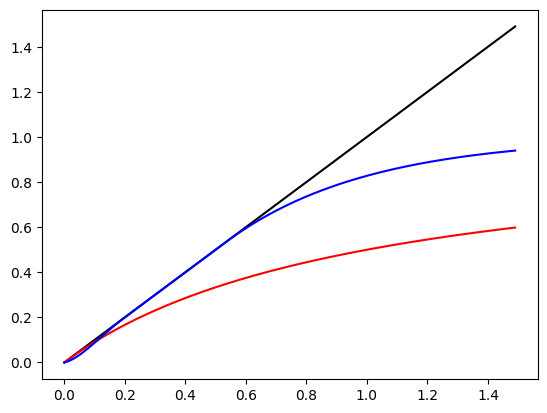

In [25]:
ranges = iota(0, 1.5, 0.01)
reinhard = reinhard(ranges)
gt = gt_tonemapper(ranges)
plt.plot(ranges, ranges, color="black", label="original")
plt.plot(ranges, reinhard, color="red", label="reinhard")
plt.plot(ranges, gt, color="blue", label="gt")